In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("HousePricePrediction.csv")

In [5]:
print(dataset.head(10))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   
5   5          50       RL    14115    Inside     1Fam            5   
6   6          20       RL    10084    Inside     1Fam            5   
7   7          60       RL    10382    Corner     1Fam            6   
8   8          50       RM     6120    Inside     1Fam            5   
9   9         190       RL     7420    Corner   2fmCon            6   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0 

In [41]:
# Data Inspection
dataset.shape

(2919, 12)

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2919 non-null   int64  
 1   MSZoning      2915 non-null   object 
 2   LotArea       2919 non-null   int64  
 3   LotConfig     2919 non-null   object 
 4   BldgType      2919 non-null   object 
 5   OverallCond   2919 non-null   int64  
 6   YearBuilt     2919 non-null   int64  
 7   YearRemodAdd  2919 non-null   int64  
 8   Exterior1st   2918 non-null   object 
 9   BsmtFinSF2    2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
 11  SalePrice     2919 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 273.8+ KB


In [43]:
dataset.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2919.000000
mean,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,56174.332503
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,163000.000000
50%,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,180921.195890
75%,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,180921.195890
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [9]:
# preprocessing
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

Categorical variables: 4
Float variables: 3
Integer variables: 0


<AxesSubplot:>

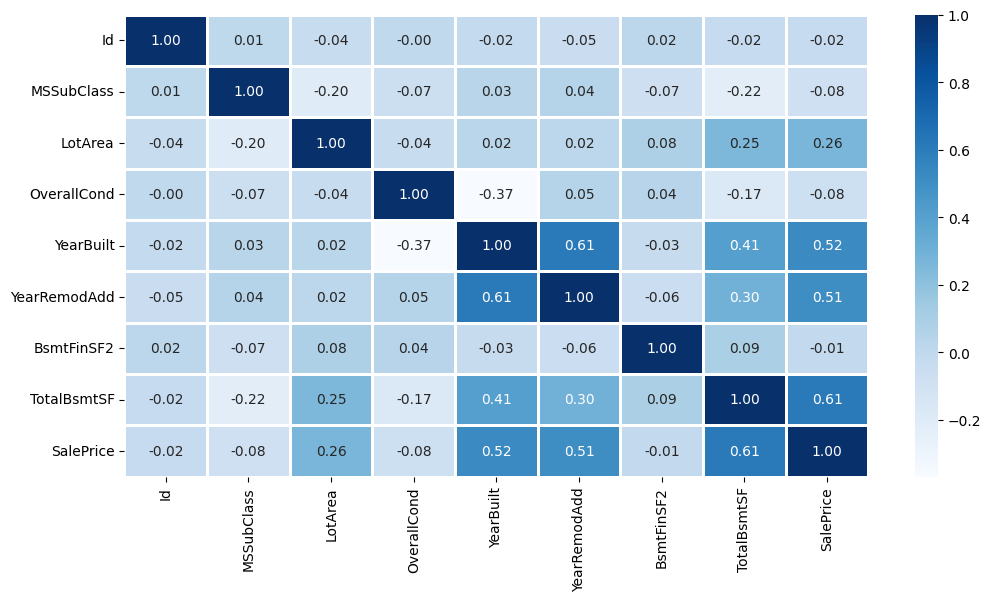

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),cmap = 'Blues',fmt = '.2f',linewidths = 2,annot = True)

<AxesSubplot:title={'center':'Categorical Features (values)'}>

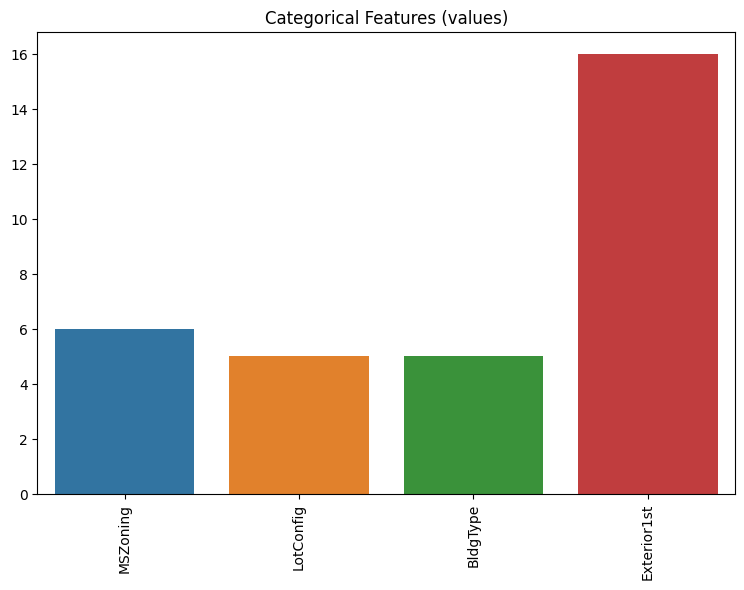

In [18]:
# Analyzing categorial features
unique_values = []
for col in object_cols:
 unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(9,6))
plt.title('Categorical Features (values)')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

In [19]:
# Data Cleaning
dataset.drop(['Id'],axis=1,inplace=True)

In [40]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

In [21]:
new_dataset = dataset.dropna()

In [22]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

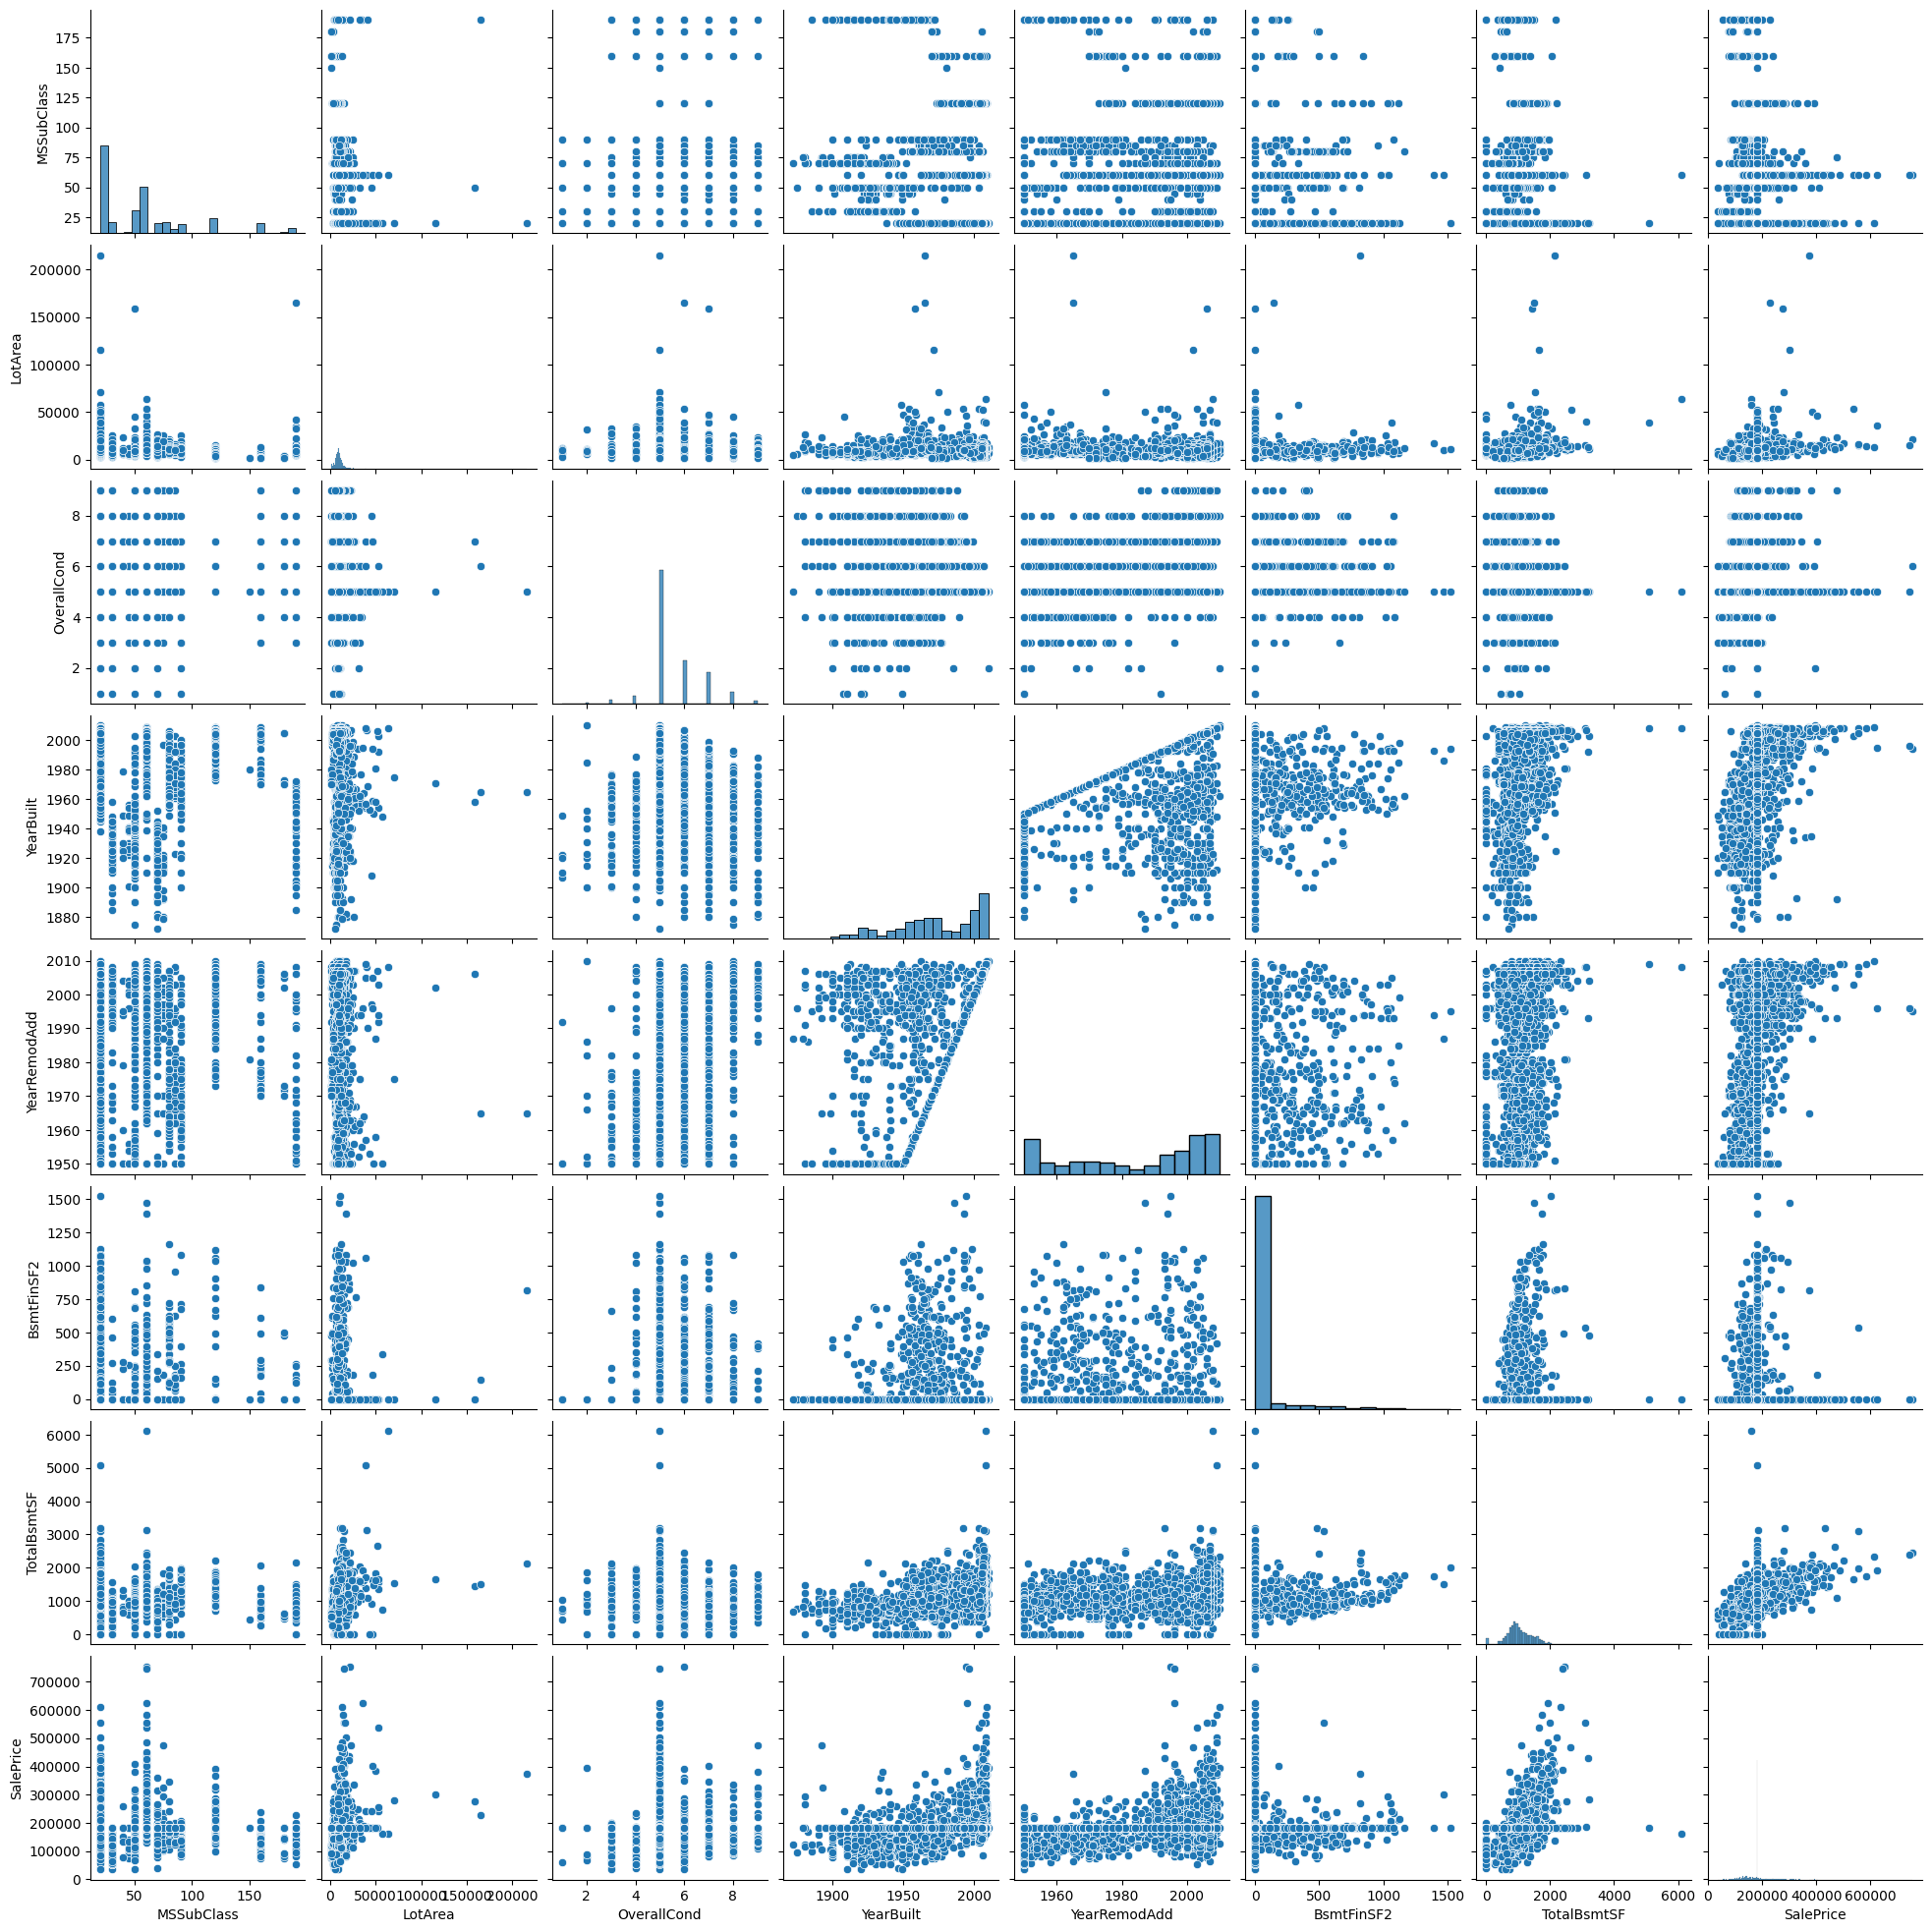

In [47]:
# Visualizing numeric variables
sns.pairplot(new_dataset)
plt.show()

In [34]:
# Converting categorial data into binary vectors using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('Categorical features: ',len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
Categorical features:  4


In [50]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [27]:
# Calculating loss
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [37]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
error = mean_absolute_percentage_error(Y_valid, Y_pred)*100
print("Mean absolute error using Lienar Regression Model is : ", error)

Mean absolute error using Lienar Regression Model is :  18.74168384159986


In [39]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
error = mean_absolute_percentage_error(Y_valid, Y_pred)*100
print("Mean absolute error using Support Vector Machine Model is : ", error)

Mean absolute error using Support Vector Machine Model is :  18.70512931870423
